In [1]:
from pynwb import NWBHDF5IO; # to read/write
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from scipy import stats;
from tqdm import tqdm;

In [2]:
data_dir = 'E:\\File\\Work\\2024\\Practice_recording_data\\'
nwb_filename = data_dir + 'Link_V4-PFC_cooling.nwb'
with NWBHDF5IO(nwb_filename, 'r') as io:
   nwbfile = io.read()
   units = nwbfile.units.to_dataframe()
   trials = nwbfile.trials.to_dataframe()

In [3]:
from cal_FR import *
temp = units.iloc[0]
temp

session                                               session_00
sess_name                                                l220428
hemisphere                                                    LH
probe                                                     probe0
unitID                                                        14
location                                                      V4
depth                                                       1220
avgWF          [-15.242637362637362, -15.315824175824176, -15...
normWF         [0.0031234957642238986, 0.0031234957642238986,...
spike_times    [18.179833333333335, 25.1715, 25.1737, 32.4072...
spkMtx         [[False, False, False, False, False, False, Fa...
Name: 0, dtype: object

In [4]:
import Data_cleaner
num_sessions = 27
session_name_list = [f"session_{i:02d}" for i in range(num_sessions)]
units_new,trials_new,_,_ = Data_cleaner.get_correct_df(units,trials)

In [16]:
units_new_pick = units_new.sample(n=1000,random_state=42)
delay = range(0,101,10)
fr_mean = np.zeros(11)
ind = 0
for i in delay:
    fr_all = []
    for unit in units_new_pick.itertuples():
        for each_trial in unit.spkMtx:
            if sum(each_trial) == 0:
                break
            fr_all.append(cal_FR(each_trial, 999+i, 1398+i, bin_size_ms=1.0))
    fr_mean[ind] = np.array(fr_all).mean()
    ind += 1
fr_mean

array([17.4968835 , 17.55091587, 17.60091378, 17.65017667, 17.68308937,
       17.67386075, 17.61548357, 17.4883899 , 17.32434906, 17.17989251,
       17.01841609])

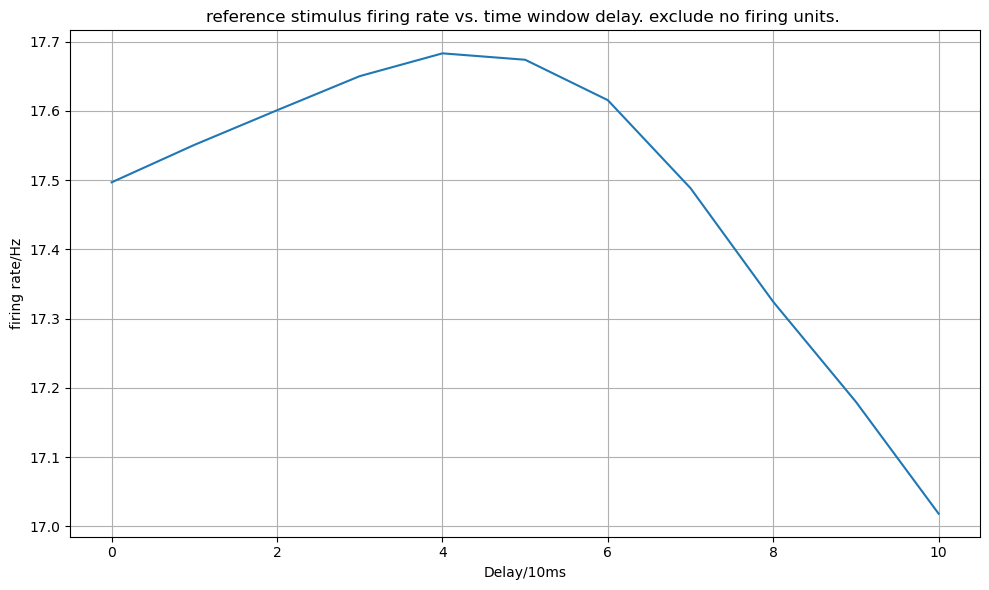

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# --- 2. 开始绘图 ---
# (可选) 创建一个 figure，设置它的大小
plt.figure(figsize=(10, 6))

# 核心绘图命令：
# 当你只给 plt.plot() 一个数组时, 
# 它会自动将其作为 Y 轴, 并使用数组的索引 (0, 1, 2... 99) 作为 X 轴
plt.plot(fr_mean)

# --- 3. 添加标签和标题 (完全按照您的要求) ---
plt.xlabel("Delay/10ms")
plt.ylabel("firing rate/Hz")
plt.title("reference stimulus firing rate vs. time window delay. exclude no firing units. ")

# --- 4. (可选) 添加网格和显示图像 ---
plt.grid(True)       # 添加网格线
plt.tight_layout()   # 自动调整布局，防止标签重叠
plt.show()           # 显示图像

In [19]:
units_new_pick = units_new.sample(n=1000,random_state=42)
delay = range(0,101,10)
fr_mean = np.zeros(11)
ind = 0
for i in delay:
    fr_all = []
    for unit in units_new_pick.itertuples():
        for each_trial in unit.spkMtx:
            #if sum(each_trial) == 0:
            #    break
            fr_all.append(cal_FR(each_trial, 999+i, 1398+i, bin_size_ms=1.0))
    fr_mean[ind] = np.array(fr_all).mean()
    ind += 1
fr_mean

array([9.06714097, 9.09311419, 9.11725276, 9.14075946, 9.15895624,
       9.15329711, 9.11944768, 9.05309016, 8.96896266, 8.89476773,
       8.82290628])

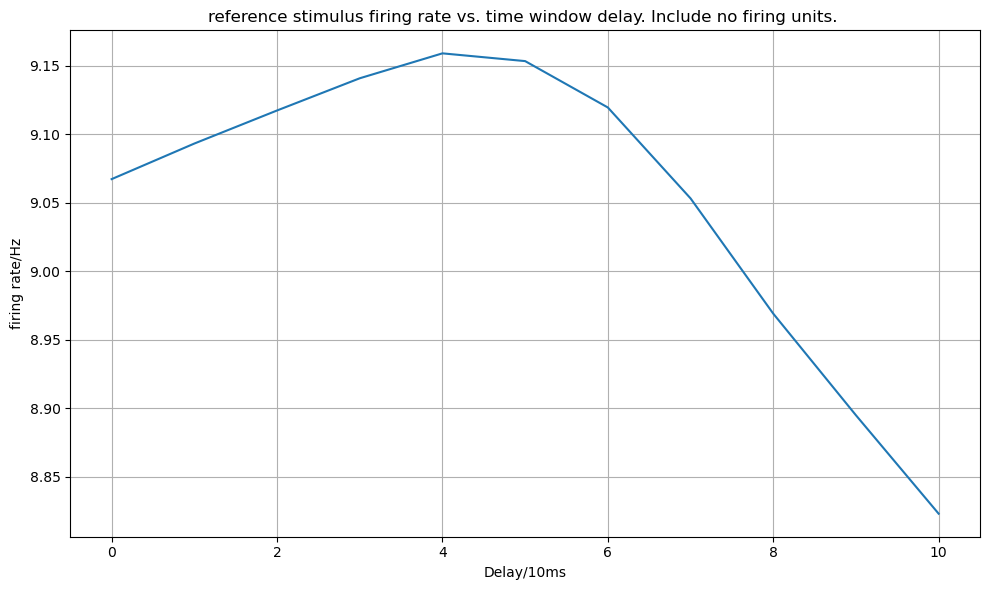

In [20]:
plt.figure(figsize=(10, 6))

# 核心绘图命令：
# 当你只给 plt.plot() 一个数组时, 
# 它会自动将其作为 Y 轴, 并使用数组的索引 (0, 1, 2... 99) 作为 X 轴
plt.plot(fr_mean)

# --- 3. 添加标签和标题 (完全按照您的要求) ---
plt.xlabel("Delay/10ms")
plt.ylabel("firing rate/Hz")
plt.title("reference stimulus firing rate vs. time window delay. Include no firing units. ")

# --- 4. (可选) 添加网格和显示图像 ---
plt.grid(True)       # 添加网格线
plt.tight_layout()   # 自动调整布局，防止标签重叠
plt.show()           # 显示图像

In [21]:
units_new_pick = units_new.sample(n=1000,random_state=42)
delay = range(0,101,10)
fr_mean = np.zeros(11)
ind = 0
for i in delay:
    fr_all = []
    for unit in units_new_pick.itertuples():
        for each_trial in unit.spkMtx:
            if sum(each_trial) == 0:
                break
            fr_all.append(cal_FR(each_trial, 1398+i, 1598+i, bin_size_ms=1.0))
    fr_mean[ind] = np.array(fr_all).mean()
    ind += 1
fr_mean

array([14.37047054, 14.27219108, 14.18248175, 14.0776525 , 13.9778415 ,
       13.85222237, 13.72305136, 13.57527372, 13.42596455, 13.24726277,
       13.07889077])

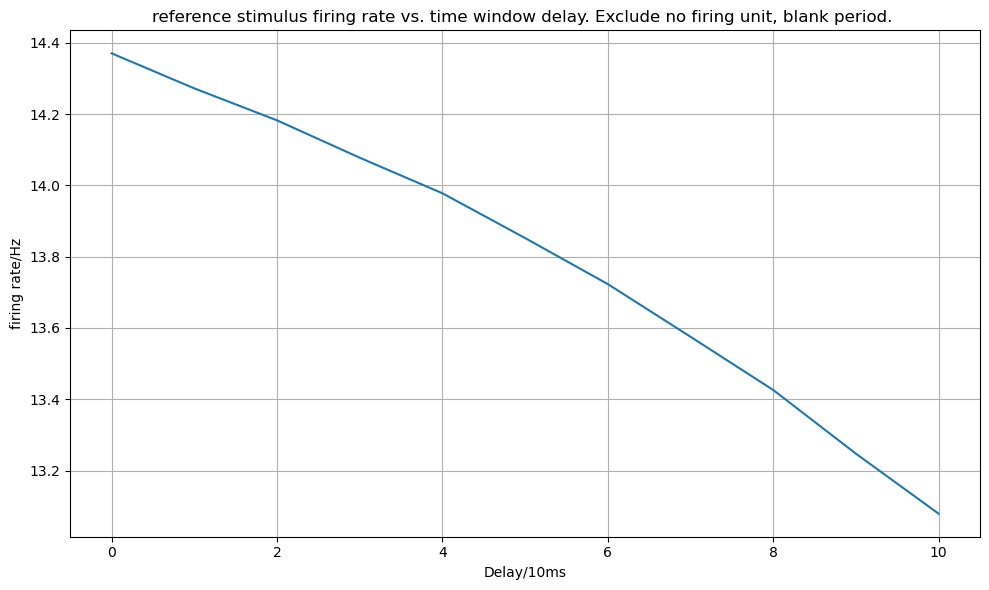

In [22]:
plt.figure(figsize=(10, 6))

# 核心绘图命令：
# 当你只给 plt.plot() 一个数组时, 
# 它会自动将其作为 Y 轴, 并使用数组的索引 (0, 1, 2... 99) 作为 X 轴
plt.plot(fr_mean)

# --- 3. 添加标签和标题 (完全按照您的要求) ---
plt.xlabel("Delay/10ms")
plt.ylabel("firing rate/Hz")
plt.title("reference stimulus firing rate vs. time window delay. Exclude no firing unit, blank period. ")

# --- 4. (可选) 添加网格和显示图像 ---
plt.grid(True)       # 添加网格线
plt.tight_layout()   # 自动调整布局，防止标签重叠
plt.show()           # 显示图像

In [23]:
units_new_pick = units_new.sample(n=1000,random_state=42)
delay = range(0,101,10)
fr_mean = np.zeros(11)
ind = 0
for i in delay:
    fr_all = []
    for unit in units_new_pick.itertuples():
        for each_trial in unit.spkMtx:
            #if sum(each_trial) == 0:
            #    break
            fr_all.append(cal_FR(each_trial, 1398+i, 1598+i, bin_size_ms=1.0))
    fr_mean[ind] = np.array(fr_all).mean()
    ind += 1
fr_mean

array([7.56405748, 7.51573516, 7.46995612, 7.41366117, 7.35968835,
       7.29725635, 7.23265704, 7.15860336, 7.08136506, 6.98538388,
       6.87687429])

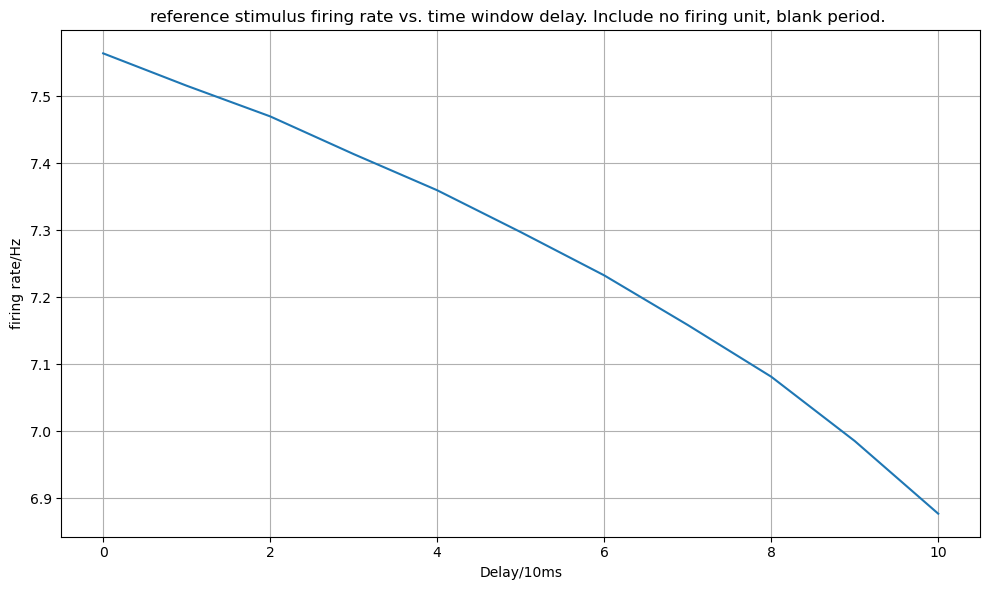

In [24]:
plt.figure(figsize=(10, 6))

# 核心绘图命令：
# 当你只给 plt.plot() 一个数组时, 
# 它会自动将其作为 Y 轴, 并使用数组的索引 (0, 1, 2... 99) 作为 X 轴
plt.plot(fr_mean)

# --- 3. 添加标签和标题 (完全按照您的要求) ---
plt.xlabel("Delay/10ms")
plt.ylabel("firing rate/Hz")
plt.title("reference stimulus firing rate vs. time window delay. Include no firing unit, blank period. ")

# --- 4. (可选) 添加网格和显示图像 ---
plt.grid(True)       # 添加网格线
plt.tight_layout()   # 自动调整布局，防止标签重叠
plt.show()           # 显示图像

In [25]:
units_new_pick = units_new.sample(n=1000,random_state=42)
delay = range(0,101,10)
fr_mean = np.zeros(11)
ind = 0
for i in delay:
    fr_all = []
    for unit in units_new_pick.itertuples():
        for each_trial in unit.spkMtx:
            if sum(each_trial) == 0:
                break
            fr_all.append(cal_FR(each_trial, 1598+i, 1898+i, bin_size_ms=1.0))
    fr_mean[ind] = np.array(fr_all).mean()
    ind += 1
fr_mean

array([10.87710723, 10.73331595, 10.59276156, 10.45444473, 10.32034237,
       10.20457508, 10.08635297,  9.98318561,  9.88090893,  9.77611227,
        9.68354623])

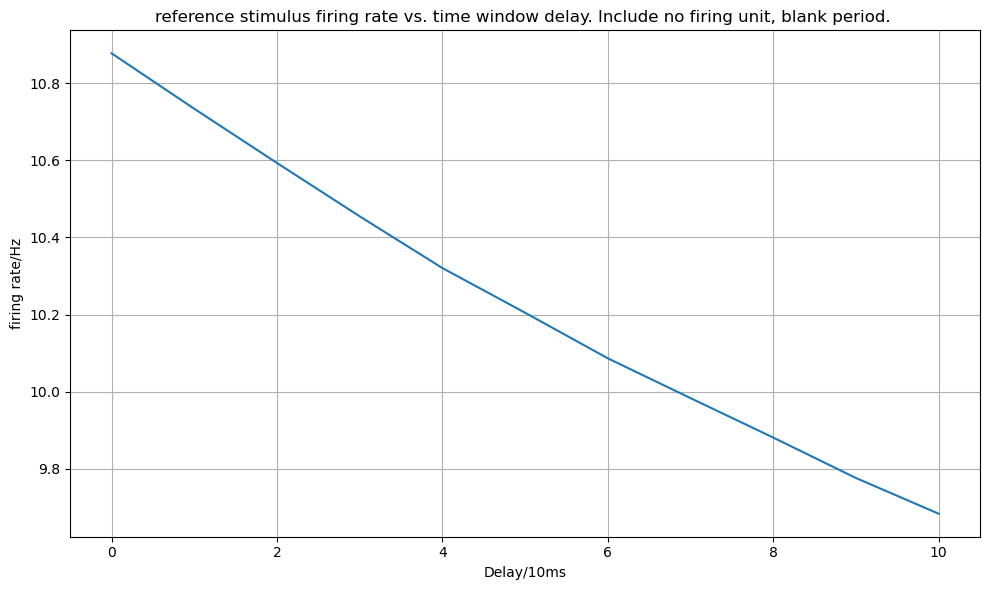

In [26]:
plt.figure(figsize=(10, 6))

# 核心绘图命令：
# 当你只给 plt.plot() 一个数组时, 
# 它会自动将其作为 Y 轴, 并使用数组的索引 (0, 1, 2... 99) 作为 X 轴
plt.plot(fr_mean)

# --- 3. 添加标签和标题 (完全按照您的要求) ---
plt.xlabel("Delay/10ms")
plt.ylabel("firing rate/Hz")
plt.title("reference stimulus firing rate vs. time window delay. Include no firing unit, blank period. ")

# --- 4. (可选) 添加网格和显示图像 ---
plt.grid(True)       # 添加网格线
plt.tight_layout()   # 自动调整布局，防止标签重叠
plt.show()           # 显示图像

In [27]:
units_new_pick = units_new.sample(n=1000,random_state=42)
delay = range(0,101,10)
fr_mean = np.zeros(11)
ind = 0
for i in delay:
    fr_all = []
    for unit in units_new_pick.itertuples():
        for each_trial in unit.spkMtx:
            #if sum(each_trial) == 0:
            #    break
            fr_all.append(cal_FR(each_trial, 1598+i, 1898+i, bin_size_ms=1.0))
    fr_mean[ind] = np.array(fr_all).mean()
    ind += 1
fr_mean

array([5.81083452, 5.74988426, 5.68995132, 5.63548827, 5.57949187,
       5.53119904, 5.48135813, 5.439265  , 5.39780585, 5.35525567,
       5.31829333])

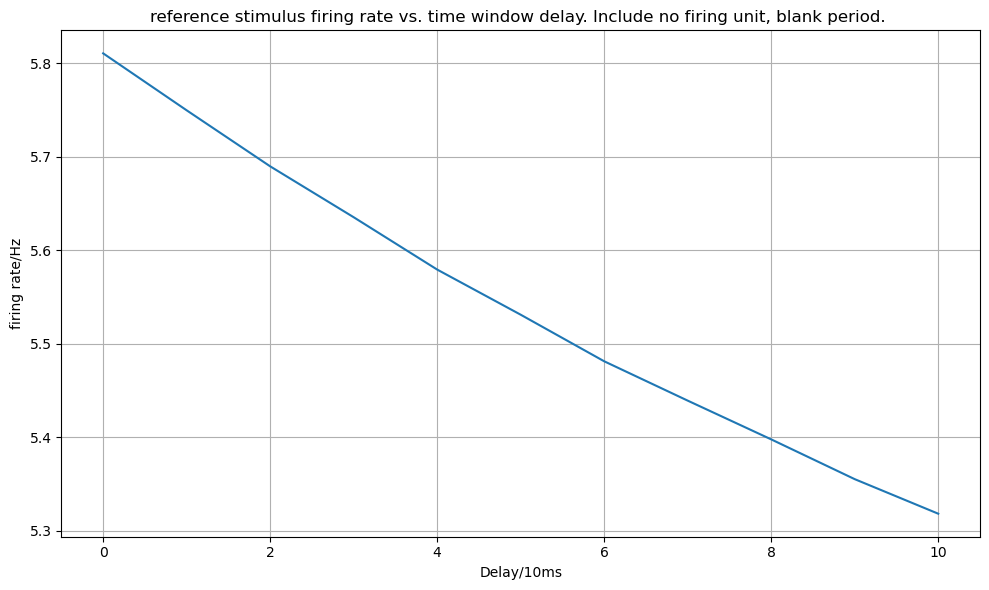

In [28]:
plt.figure(figsize=(10, 6))

# 核心绘图命令：
# 当你只给 plt.plot() 一个数组时, 
# 它会自动将其作为 Y 轴, 并使用数组的索引 (0, 1, 2... 99) 作为 X 轴
plt.plot(fr_mean)

# --- 3. 添加标签和标题 (完全按照您的要求) ---
plt.xlabel("Delay/10ms")
plt.ylabel("firing rate/Hz")
plt.title("reference stimulus firing rate vs. time window delay. Include no firing unit, blank period. ")

# --- 4. (可选) 添加网格和显示图像 ---
plt.grid(True)       # 添加网格线
plt.tight_layout()   # 自动调整布局，防止标签重叠
plt.show()           # 显示图像

In [30]:
units_new.iloc[0]

session                                               session_00
sess_name                                                l220428
hemisphere                                                    LH
probe                                                     probe0
unitID                                                        14
location                                                      V4
depth                                                       1220
avgWF          [-15.242637362637362, -15.315824175824176, -15...
normWF         [0.0031234957642238986, 0.0031234957642238986,...
spike_times    [18.179833333333335, 25.1715, 25.1737, 32.4072...
spkMtx         [[False, False, False, False, False, False, Fa...
Name: 0, dtype: object

In [31]:
units_new_pick = units_new[units_new['location'] == 'V4'].sample(n=1000, random_state=42)
delay = range(0,101,10)
fr_mean = np.zeros(11)
ind = 0
for i in delay:
    fr_all = []
    for unit in units_new_pick.itertuples():
        for each_trial in unit.spkMtx:
            if sum(each_trial) == 0:
                break
            fr_all.append(cal_FR(each_trial, 999+i, 1398+i, bin_size_ms=1.0))
    fr_mean[ind] = np.array(fr_all).mean()
    ind += 1
fr_mean

array([25.53579429, 25.80318271, 26.06720237, 26.32839956, 26.56486823,
       26.5920004 , 26.42929844, 26.12647432, 25.76171966, 25.45825821,
       25.14030198])

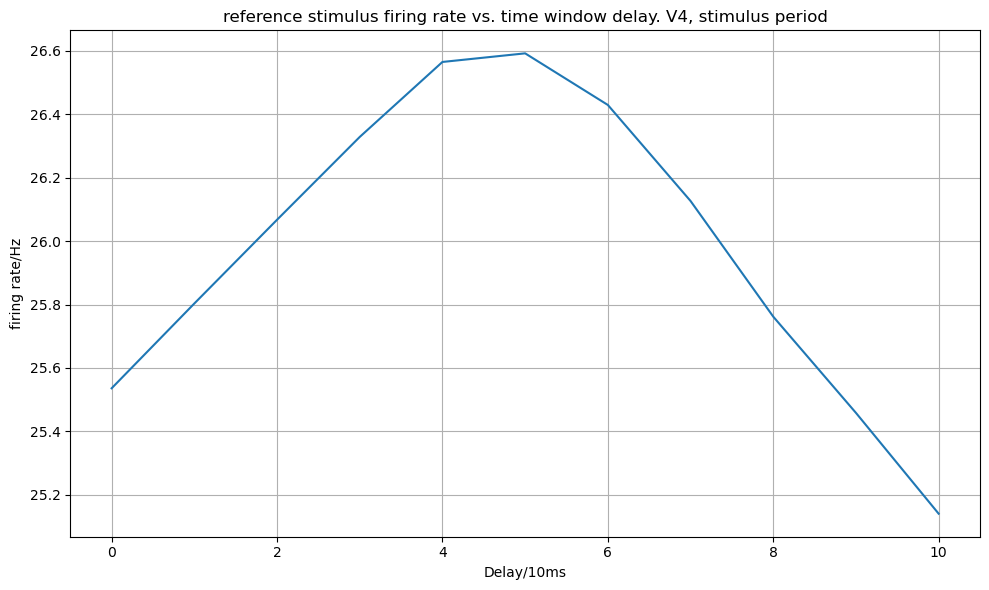

In [32]:
plt.figure(figsize=(10, 6))

# 核心绘图命令：
# 当你只给 plt.plot() 一个数组时, 
# 它会自动将其作为 Y 轴, 并使用数组的索引 (0, 1, 2... 99) 作为 X 轴
plt.plot(fr_mean)

# --- 3. 添加标签和标题 (完全按照您的要求) ---
plt.xlabel("Delay/10ms")
plt.ylabel("firing rate/Hz")
plt.title("reference stimulus firing rate vs. time window delay. V4, stimulus period")

# --- 4. (可选) 添加网格和显示图像 ---
plt.grid(True)       # 添加网格线
plt.tight_layout()   # 自动调整布局，防止标签重叠
plt.show()           # 显示图像

In [33]:
units_new_pick = units_new[units_new['location'] == 'V4'].sample(n=1000, random_state=42)
delay = range(0,101,10)
fr_mean = np.zeros(11)
ind = 0
for i in delay:
    fr_all = []
    for unit in units_new_pick.itertuples():
        for each_trial in unit.spkMtx:
            if sum(each_trial) == 0:
                break
            fr_all.append(cal_FR(each_trial, 1399+i, 1598+i, bin_size_ms=1.0))
    fr_mean[ind] = np.array(fr_all).mean()
    ind += 1
fr_mean

array([17.89493842, 17.3913488 , 16.87943477, 16.3350629 , 15.76290651,
       15.18447032, 14.5618564 , 13.90751483, 13.25802917, 12.61354544,
       12.06336839])

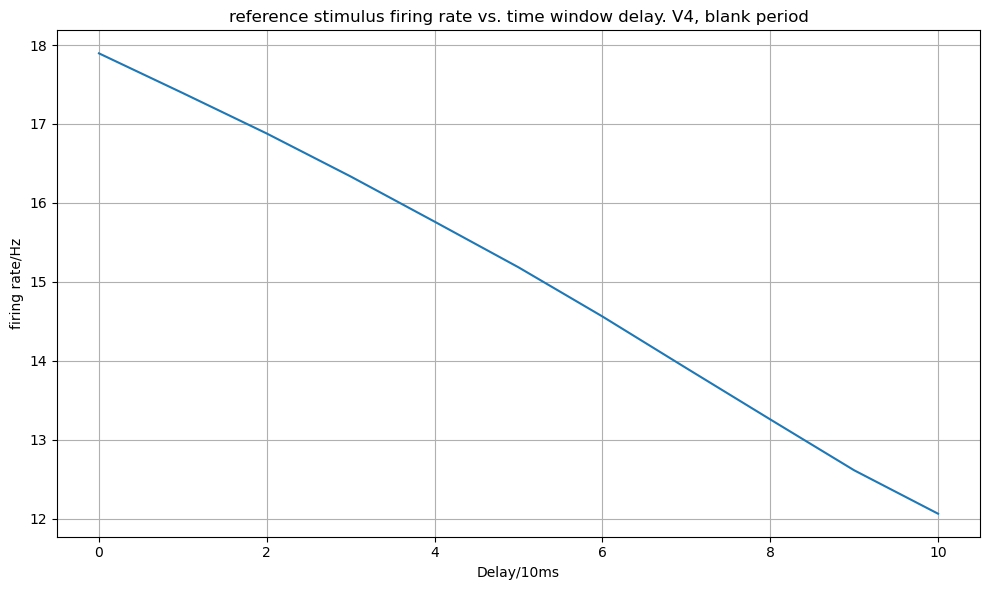

In [35]:
plt.figure(figsize=(10, 6))

# 核心绘图命令：
# 当你只给 plt.plot() 一个数组时, 
# 它会自动将其作为 Y 轴, 并使用数组的索引 (0, 1, 2... 99) 作为 X 轴
plt.plot(fr_mean)

# --- 3. 添加标签和标题 (完全按照您的要求) ---
plt.xlabel("Delay/10ms")
plt.ylabel("firing rate/Hz")
plt.title("reference stimulus firing rate vs. time window delay. V4, blank period")

# --- 4. (可选) 添加网格和显示图像 ---
plt.grid(True)       # 添加网格线
plt.tight_layout()   # 自动调整布局，防止标签重叠
plt.show()           # 显示图像

In [36]:
units_new_pick = units_new[units_new['location'] == 'V4'].sample(n=1000, random_state=42)
delay = range(0,101,10)
fr_mean = np.zeros(11)
ind = 0
for i in delay:
    fr_all = []
    for unit in units_new_pick.itertuples():
        for each_trial in unit.spkMtx:
            if sum(each_trial) == 0:
                break
            fr_all.append(cal_FR(each_trial, 1599+i, 1898+i, bin_size_ms=1.0))
    fr_mean[ind] = np.array(fr_all).mean()
    ind += 1
fr_mean

array([8.43071315, 8.30202223, 8.19201774, 8.10852416, 8.03516353,
       7.99443733, 7.97327233, 7.97084237, 7.9826763 , 7.99363544,
       8.01193307])

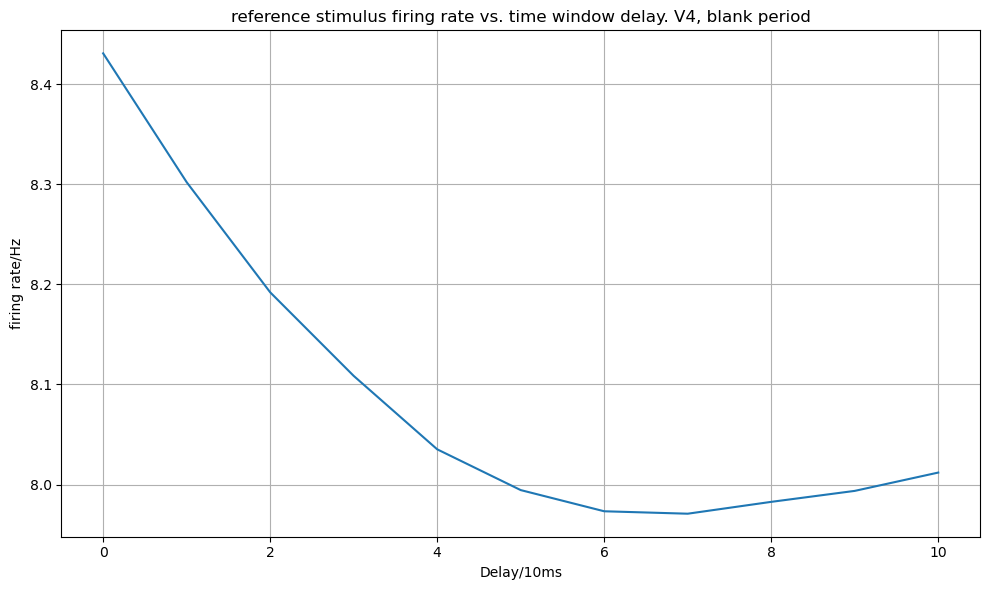

In [37]:
plt.figure(figsize=(10, 6))

# 核心绘图命令：
# 当你只给 plt.plot() 一个数组时, 
# 它会自动将其作为 Y 轴, 并使用数组的索引 (0, 1, 2... 99) 作为 X 轴
plt.plot(fr_mean)

# --- 3. 添加标签和标题 (完全按照您的要求) ---
plt.xlabel("Delay/10ms")
plt.ylabel("firing rate/Hz")
plt.title("reference stimulus firing rate vs. time window delay. V4, blank period")

# --- 4. (可选) 添加网格和显示图像 ---
plt.grid(True)       # 添加网格线
plt.tight_layout()   # 自动调整布局，防止标签重叠
plt.show()           # 显示图像

In [38]:
units_new_pick = units_new[units_new['location'] == 'PFC'].sample(n=1000, random_state=42)
delay = range(0,101,10)
fr_mean = np.zeros(11)
ind = 0
for i in delay:
    fr_all = []
    for unit in units_new_pick.itertuples():
        for each_trial in unit.spkMtx:
            if sum(each_trial) == 0:
                break
            fr_all.append(cal_FR(each_trial, 999+i, 1398+i, bin_size_ms=1.0))
    fr_mean[ind] = np.array(fr_all).mean()
    ind += 1
fr_mean

array([17.99121261, 18.0118415 , 18.0279038 , 18.0429577 , 18.05824209,
       18.06217483, 18.04944024, 17.98269888, 17.86295914, 17.74978837,
       17.65816846])

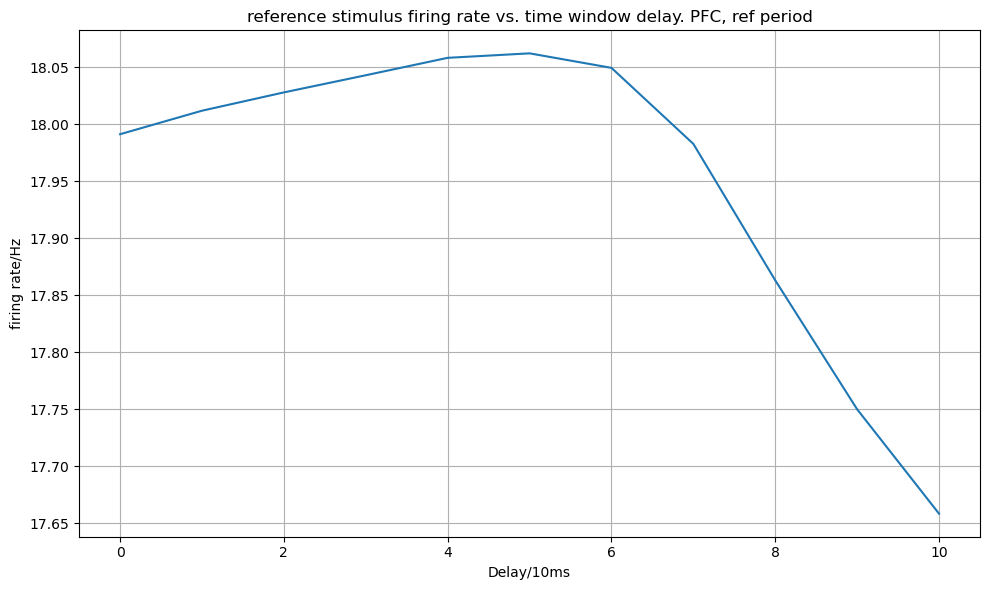

In [40]:
plt.figure(figsize=(10, 6))

# 核心绘图命令：
# 当你只给 plt.plot() 一个数组时, 
# 它会自动将其作为 Y 轴, 并使用数组的索引 (0, 1, 2... 99) 作为 X 轴
plt.plot(fr_mean)

# --- 3. 添加标签和标题 (完全按照您的要求) ---
plt.xlabel("Delay/10ms")
plt.ylabel("firing rate/Hz")
plt.title("reference stimulus firing rate vs. time window delay. PFC, ref period")

# --- 4. (可选) 添加网格和显示图像 ---
plt.grid(True)       # 添加网格线
plt.tight_layout()   # 自动调整布局，防止标签重叠
plt.show()           # 显示图像

In [41]:
units_new_pick = units_new[units_new['location'] == 'PFC'].sample(n=1000, random_state=42)
delay = range(0,101,10)
fr_mean = np.zeros(11)
ind = 0
for i in delay:
    fr_all = []
    for unit in units_new_pick.itertuples():
        for each_trial in unit.spkMtx:
            if sum(each_trial) == 0:
                break
            fr_all.append(cal_FR(each_trial, 1399+i, 1598+i, bin_size_ms=1.0))
    fr_mean[ind] = np.array(fr_all).mean()
    ind += 1
fr_mean

array([16.18219967, 16.13191317, 16.07356813, 16.00641356, 15.93472426,
       15.86476798, 15.76881638, 15.666106  , 15.55253535, 15.33024651,
       15.06359234])

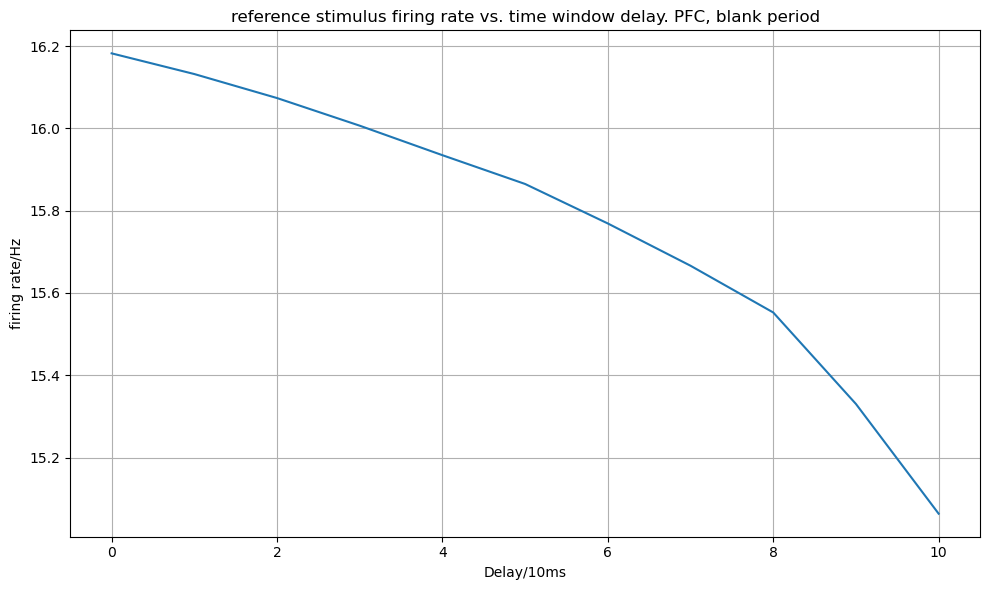

In [42]:
plt.figure(figsize=(10, 6))

# 核心绘图命令：
# 当你只给 plt.plot() 一个数组时, 
# 它会自动将其作为 Y 轴, 并使用数组的索引 (0, 1, 2... 99) 作为 X 轴
plt.plot(fr_mean)

# --- 3. 添加标签和标题 (完全按照您的要求) ---
plt.xlabel("Delay/10ms")
plt.ylabel("firing rate/Hz")
plt.title("reference stimulus firing rate vs. time window delay. PFC, blank period")

# --- 4. (可选) 添加网格和显示图像 ---
plt.grid(True)       # 添加网格线
plt.tight_layout()   # 自动调整布局，防止标签重叠
plt.show()           # 显示图像

In [43]:
units_new_pick = units_new[units_new['location'] == 'PFC'].sample(n=1000, random_state=42)
delay = range(0,101,10)
fr_mean = np.zeros(11)
ind = 0
for i in delay:
    fr_all = []
    for unit in units_new_pick.itertuples():
        for each_trial in unit.spkMtx:
            if sum(each_trial) == 0:
                break
            fr_all.append(cal_FR(each_trial, 1599+i, 1898+i, bin_size_ms=1.0))
    fr_mean[ind] = np.array(fr_all).mean()
    ind += 1
fr_mean

array([11.91670296, 11.77083436, 11.62984856, 11.49153483, 11.35893052,
       11.23259309, 11.12125006, 11.01567411, 10.9122512 , 10.81870921,
       10.73233763])

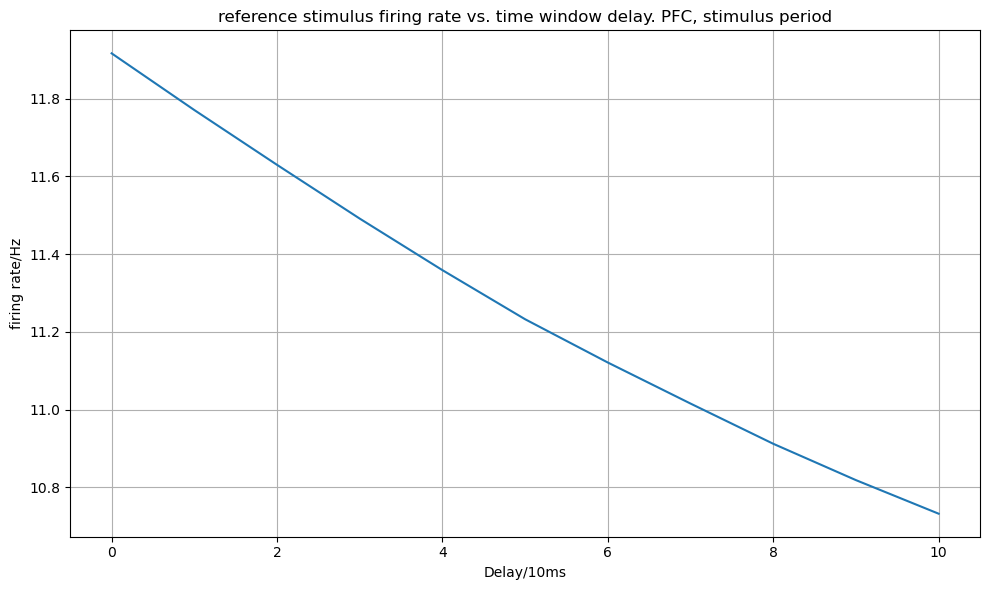

In [44]:
plt.figure(figsize=(10, 6))

# 核心绘图命令：
# 当你只给 plt.plot() 一个数组时, 
# 它会自动将其作为 Y 轴, 并使用数组的索引 (0, 1, 2... 99) 作为 X 轴
plt.plot(fr_mean)

# --- 3. 添加标签和标题 (完全按照您的要求) ---
plt.xlabel("Delay/10ms")
plt.ylabel("firing rate/Hz")
plt.title("reference stimulus firing rate vs. time window delay. PFC, stimulus period")

# --- 4. (可选) 添加网格和显示图像 ---
plt.grid(True)       # 添加网格线
plt.tight_layout()   # 自动调整布局，防止标签重叠
plt.show()           # 显示图像

In [48]:
#More sampling and repeitition to prove that the random reveal true feature of the data: 
units_new_pick = units_new[units_new['location'] == 'V4'].sample(n=3000, random_state=22)
delay = range(0,101,10)
fr_mean = np.zeros(11)
ind = 0
for i in delay:
    fr_all = []
    for unit in units_new_pick.itertuples():
        for each_trial in unit.spkMtx:
            if sum(each_trial) == 0:
                break
            fr_all.append(cal_FR(each_trial, 999+i, 1398+i, bin_size_ms=1.0))
    fr_mean[ind] = np.array(fr_all).mean()
    ind += 1
fr_mean

array([24.5226796 , 24.76378251, 25.00133107, 25.22590628, 25.4311564 ,
       25.47233411, 25.32682328, 25.03305028, 24.68166403, 24.37081045,
       24.04502204])

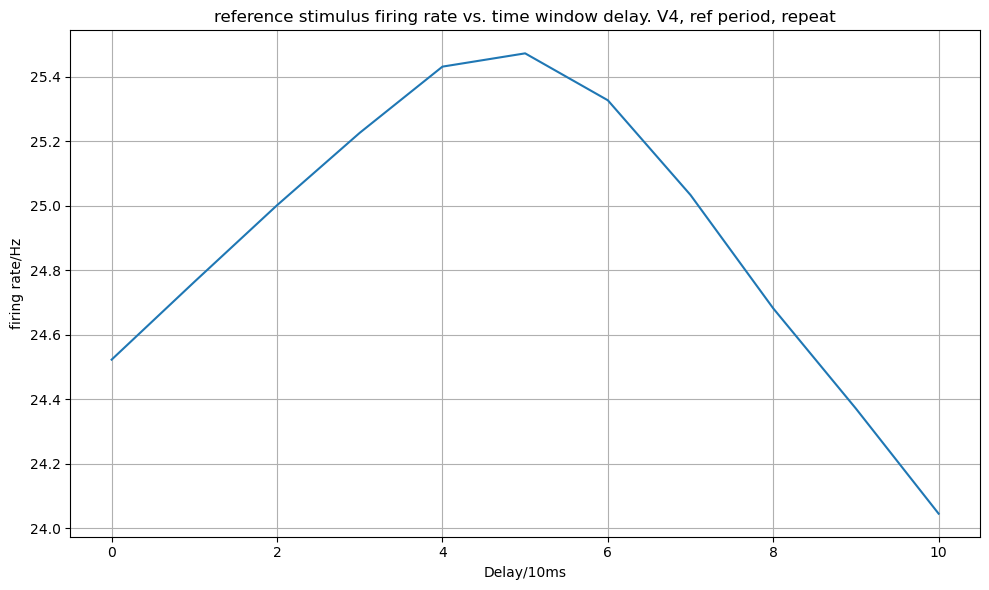

In [49]:
plt.figure(figsize=(10, 6))

# 核心绘图命令：
# 当你只给 plt.plot() 一个数组时, 
# 它会自动将其作为 Y 轴, 并使用数组的索引 (0, 1, 2... 99) 作为 X 轴
plt.plot(fr_mean)

# --- 3. 添加标签和标题 (完全按照您的要求) ---
plt.xlabel("Delay/10ms")
plt.ylabel("firing rate/Hz")
plt.title("reference stimulus firing rate vs. time window delay. V4, ref period, repeat")

# --- 4. (可选) 添加网格和显示图像 ---
plt.grid(True)       # 添加网格线
plt.tight_layout()   # 自动调整布局，防止标签重叠
plt.show()           # 显示图像

In [50]:
#check the base line. Do 2 random sets and chec whether the base line is same between -400ms-0ms. 
units_new_pick = units_new[units_new['location'] == 'V4'].sample(n=3000, random_state=22)
fr_all = []
for unit in units_new_pick.itertuples():
    for each_trial in unit.spkMtx:
        fr_all.append(cal_FR(each_trial, 699+i, 998+i, bin_size_ms=1.0))

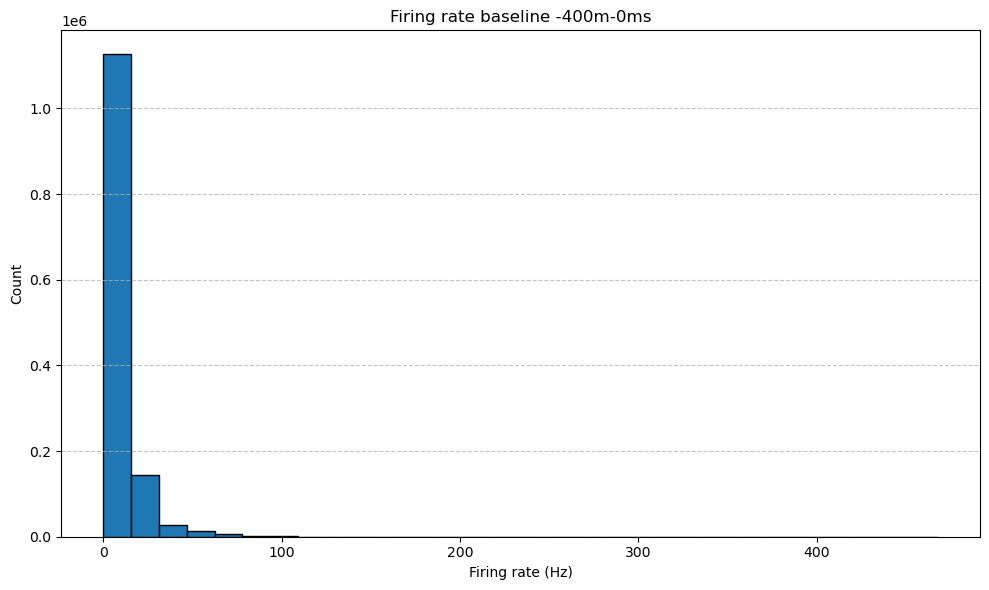

np.float64(7.21455609742227)

In [53]:
plt.figure(figsize=(10, 6))

# You can adjust the number of 'bins' to change the plot's resolution
plt.hist(fr_all, bins=30, edgecolor='black')

# Set the labels and title as requested
plt.xlabel("Firing rate (Hz)")
plt.ylabel("Count")
plt.title("Firing rate baseline -400m-0ms")

# Add grid lines for easier reading
plt.grid(axis='y', alpha=0.75, linestyle='--')

# Save the plot to a file
plt.tight_layout()   # 自动调整布局，防止标签重叠
plt.show()           # 显示图像
np.array(fr_all).mean()

In [54]:
#check the base line. Do 2 random sets and chec whether the base line is same between -400ms-0ms. 
units_new_pick = units_new[units_new['location'] == 'V4'].sample(n=3000, random_state=42)
fr_all = []
for unit in units_new_pick.itertuples():
    for each_trial in unit.spkMtx:
        fr_all.append(cal_FR(each_trial, 699+i, 998+i, bin_size_ms=1.0))

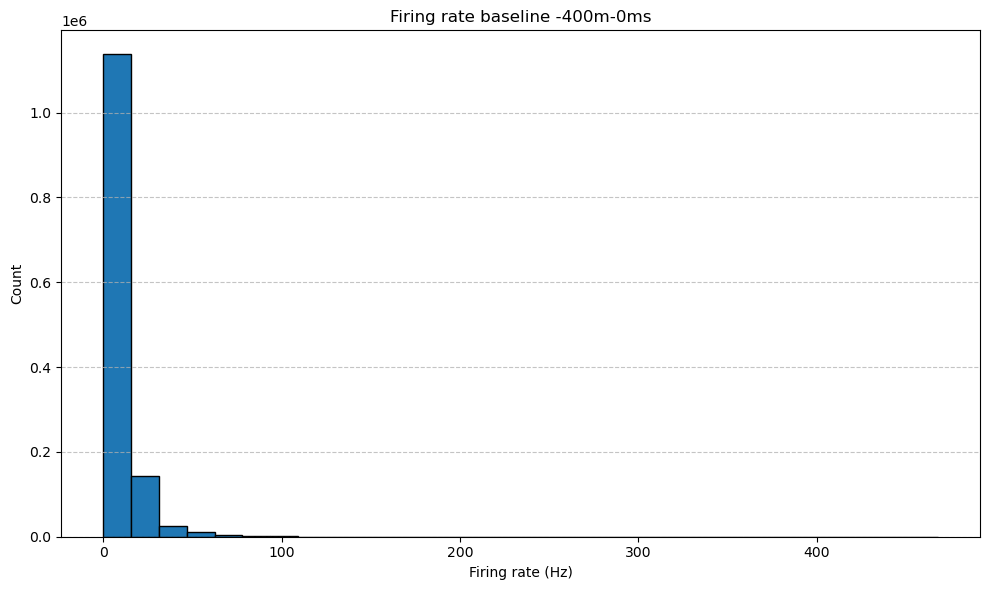

np.float64(7.157476713306625)

In [55]:
plt.figure(figsize=(10, 6))

# You can adjust the number of 'bins' to change the plot's resolution
plt.hist(fr_all, bins=30, edgecolor='black')

# Set the labels and title as requested
plt.xlabel("Firing rate (Hz)")
plt.ylabel("Count")
plt.title("Firing rate baseline -400m-0ms")

# Add grid lines for easier reading
plt.grid(axis='y', alpha=0.75, linestyle='--')

# Save the plot to a file
plt.tight_layout()   # 自动调整布局，防止标签重叠
plt.show()           # 显示图像
np.array(fr_all).mean()